In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer

In [3]:
## Load Datasets
w20 = pd.read_excel(r"Datasets_world_clean\SB2020_World2500.xlsx")
w19 = pd.read_excel(r"Datasets_world_clean\SB2019_World2500.xlsx")
w18 = pd.read_excel(r"Datasets_world_clean\SB2018_World2500.xlsx")
w17 = pd.read_excel(r"Datasets_world_clean\SB2017_World2500.xlsx")
w16 = pd.read_excel(r"Datasets_world_clean\SB2016_World2500.xlsx")
w15 = pd.read_excel(r"Datasets_world_clean\SB2015_World2500.xlsx")

In [168]:
w20.columns

Index(['World rank', 'Company', 'Country', 'Region', 'Industry',
       'R&D 2019 (€million)', 'R&D one-year growth (%)',
       'Net sales (€million)', 'Net sales one-year growth (%)',
       'R&D intensity (%)', 'Capex (€million)', 'Capex one-year growth (%)',
       'Capex intensity (%)', 'Op.profits (€million)',
       'Op.profits one-year growth (%)', 'Profitability (%)', 'Employees',
       'Employees one-year growth (%)', 'Market cap (€million)',
       'Market cap one-year growth (%)'],
      dtype='object')

In [5]:
## Fill missing value with columns mean 
for column in w20.columns:
    if w20[column].isnull().values.any() == True:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w20[column] = imputer.fit_transform(np.array(w20[column]).reshape(-1,1))

for column in w19.columns:
    if w19[column].isnull().values.any() == True:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w19[column] = imputer.fit_transform(np.array(w19[column]).reshape(-1,1))
        
for column in w18.columns:
    if w18[column].isnull().values.any() == True:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w18[column] = imputer.fit_transform(np.array(w18[column]).reshape(-1,1))

for column in w17.columns:
    if w17[column].isnull().values.any() == True and w17[column].dtypes == "float":
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w17[column] = imputer.fit_transform(np.array(w17[column]).reshape(-1,1))

for column in w16.columns:
    if w16[column].isnull().values.any() == True:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w16[column] = imputer.fit_transform(np.array(w16[column]).reshape(-1,1))

for column in w15.columns:
    if w15[column].isnull().values.any() == True and w15[column].dtypes == "float":
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        w15[column] = imputer.fit_transform(np.array(w15[column]).reshape(-1,1))

## Employees Analysis 

In [124]:
# Group by industry
w20_company = w20.groupby(['Industry'],as_index=False).sum()
w19_company = w19.groupby(['Industry'],as_index=False)['Employees'].sum()
w18_company = w18.groupby(['Industry'],as_index=False).sum()
w17_company = w17.groupby(['Industry'],as_index=False).sum()
w16_company = w16.groupby(['Industrial sector (ICB-3D)'],as_index=False).sum()
w15_company = w15.groupby(['Industrial sector (ICB-3D)'],as_index=False).sum()

In [140]:
w19_company = w19.groupby(['Industry'],as_index=False)['Employees'].sum()
w19_company

,Industry,Employees
0,Aerospace & Defence,NaN
1,Alternative Energy,78540.0
2,Automobiles & Parts,NaN
3,Banks,1717323.0
4,Beverages,595731.0
5,Chemicals,NaN
6,Construction & Materials,NaN
7,Electricity,NaN
8,Electronic & Electrical Equipment,NaN
9,Financial Services,88983.0


In [125]:
#Select only Industy and Employees
w20_empl = w20_company[["Industry", "Employees"]]  
w19_empl = w19_company[["Industry", "Employees"]]  
w18_empl = w18_company[["Industry", "Employees"]]  
w17_empl = w17_company[["Industry", "Employees (th)"]]  
w16_empl = w16_company[["Industrial sector (ICB-3D)", "Employees 2015/16 "]] 
w15_empl = w15_company[["Industrial sector (ICB-3D)", "Employees 2014"]] 

In [126]:
#Change name 
w20_empl.columns = ["Industry", "Employees 2020"]
w18_empl.columns = ["Industry", "Employees 2018"] 
w17_empl.columns = ["Industry", "Employees 2017"] 
w16_empl.columns = ["Industry", "Employees 2016"] 
w15_empl.columns = ["Industry", "Employees 2015"] 


In [129]:
#Merge data
w17_empl['Employees 2017'] = w17_empl['Employees 2017']*1000 #scale column
w33 = pd.merge(w20_empl, w18_empl, on="Industry")
w34 = pd.merge(w33, w17_empl, on ="Industry")
w35 = pd.merge(w34, w16_empl, on = "Industry")
w36 = pd.merge(w35, w15_empl, on = 'Industry')

C:\Users\loren\Anaconda_file\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
columns_titles = ["Industry","Employees 2015","Employees 2016","Employees 2017","Employees 2018","Employees 2020" ]
w36= w36.sort_values(by = "Employees 2020", ascending = False).head(50)
w36=w36.reindex(columns=columns_titles)
w36

,Industry,Employees 2015,Employees 2016,Employees 2017,Employees 2018,Employees 2020
1,Automobiles & Parts,7.257129e+06,6703085,7.738893e+06,7.627383e+06,7.762161e+06
29,Technology Hardware & Equipment,6.782458e+06,2966275,5.980526e+06,4.844950e+06,4.688173e+06
27,Software & Computer Services,3.996877e+06,2622988,3.817424e+06,3.958633e+06,3.822340e+06
16,Industrial Engineering,3.644235e+06,2914575,3.300087e+06,3.346411e+06,3.725095e+06
5,Construction & Materials,3.279055e+06,2527603,3.161788e+06,3.147039e+06,3.142419e+06
25,Pharmaceuticals & Biotechnology,3.264174e+06,2038867,3.286823e+06,2.835137e+06,3.100172e+06
12,General Industrials,2.993613e+06,2077172,3.031833e+06,2.591017e+06,2.403634e+06
4,Chemicals,2.155354e+06,1429763,1.983010e+06,1.841614e+06,2.051433e+06
22,Oil & Gas Producers,2.667396e+06,2077743,1.826483e+06,2.216886e+06,1.856481e+06
10,Food Producers,1.787212e+06,1551711,1.753708e+06,1.664031e+06,1.695566e+06


In [61]:
import matplotlib.pyplot as plt
import numpy as np 

In [164]:
top_6 = w36.head(6)
top_6

,Industry,Employees 2015,Employees 2016,Employees 2017,Employees 2018,Employees 2020
1,Automobiles & Parts,7.257129e+06,6703085,7.738893e+06,7.627383e+06,7.762161e+06
29,Technology Hardware & Equipment,6.782458e+06,2966275,5.980526e+06,4.844950e+06,4.688173e+06
27,Software & Computer Services,3.996877e+06,2622988,3.817424e+06,3.958633e+06,3.822340e+06
16,Industrial Engineering,3.644235e+06,2914575,3.300087e+06,3.346411e+06,3.725095e+06
5,Construction & Materials,3.279055e+06,2527603,3.161788e+06,3.147039e+06,3.142419e+06
25,Pharmaceuticals & Biotechnology,3.264174e+06,2038867,3.286823e+06,2.835137e+06,3.100172e+06


Text(0,0.5,'N. of Employees ')

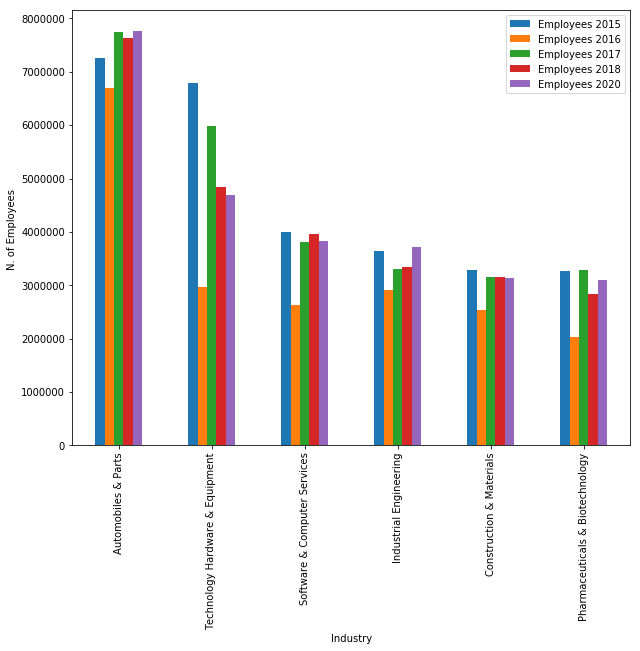

In [165]:
ax = top_6.plot(x = "Industry", kind ='bar', stacked = False, figsize =(10,8))
ax.set_xlabel('Industry')
ax.set_ylabel("N. of Employees ")

### R&D Analysis 

In [156]:
w20_red = w20_company[["Industry", "R&D 2019 (€million)"]]  
#w19_empl = w19_company[["Industry", "R&D 2018/19 (€million)"]]  
w18_red = w18_company[["Industry", "R&D 2017/18 (€mn)"]]  
w17_red = w17_company[["Industry", "R&D 2016/17 (€million)"]]  
w16_red = w16_company[["Industrial sector (ICB-3D)", " R&D 2015/16 (€million)"]] 
w15_red = w15_company[["Industrial sector (ICB-3D)", " R&D 2014(€million)"]] 

In [157]:
w20_red.columns = ["Industry", "R&D 2020"]
w18_red.columns = ["Industry", "R&D 2018"] 
w17_red.columns = ["Industry", "R&D 2017"] 
w16_red.columns = ["Industry", "R&D 2016"] 
w15_red.columns = ["Industry", "R&D 2015"]

In [158]:
w77 = pd.merge(w15_red, w16_red, on="Industry")
w78 = pd.merge(w77, w17_empl, on ="Industry")
w79 = pd.merge(w78, w18_empl, on = "Industry")
w80 = pd.merge(w79, w20_empl, on = 'Industry')

In [161]:
w80 =w80.sort_values(by = "R&D 2019 (€million)", ascending = False).head(50)
w80

,Industry,R&D 2015,R&D 2016,R&D 2016/17 (€million),R&D 2017/18 (€mn),R&D 2019 (€million)
25,Pharmaceuticals & Biotechnology,110152.367926,132352.039238,144120.234372,138884.840052,166728.967439
27,Software & Computer Services,63441.795618,79302.968482,88279.660309,94365.077358,142658.111988
29,Technology Hardware & Equipment,94555.332855,111049.195026,120146.128839,117199.612633,139649.182632
1,Automobiles & Parts,94799.966002,107831.336545,114228.126756,116966.739784,132864.125472
16,Industrial Engineering,24470.410445,27543.487347,27783.381832,26720.416467,32239.440182
4,Chemicals,21073.781176,23175.215617,23484.725373,21460.392241,23135.672502
12,General Industrials,17740.283263,19645.889224,21996.637167,19997.358826,20425.033881
5,Construction & Materials,8625.096680,11049.805900,12284.650552,13042.857228,19151.781897
14,Health Care Equipment & Services,13152.393741,14846.516288,15496.048650,14676.372593,18869.001289
19,Leisure Goods,13095.319026,14426.513344,15451.298657,14032.172236,16474.417582


In [163]:
top_6_2 = w80.head(6)
top_6_2

,Industry,R&D 2015,R&D 2016,R&D 2016/17 (€million),R&D 2017/18 (€mn),R&D 2019 (€million)
25,Pharmaceuticals & Biotechnology,110152.367926,132352.039238,144120.234372,138884.840052,166728.967439
27,Software & Computer Services,63441.795618,79302.968482,88279.660309,94365.077358,142658.111988
29,Technology Hardware & Equipment,94555.332855,111049.195026,120146.128839,117199.612633,139649.182632
1,Automobiles & Parts,94799.966002,107831.336545,114228.126756,116966.739784,132864.125472
16,Industrial Engineering,24470.410445,27543.487347,27783.381832,26720.416467,32239.440182
4,Chemicals,21073.781176,23175.215617,23484.725373,21460.392241,23135.672502


Text(0,0.5,'Million in €')

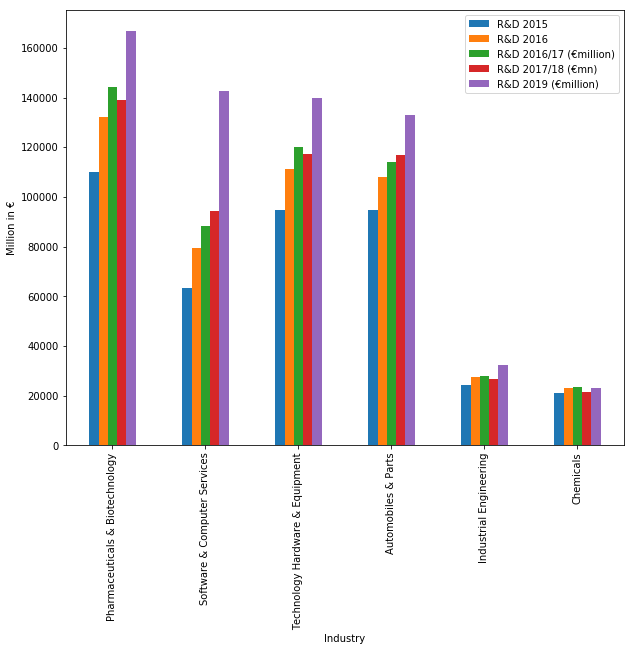

In [167]:
ax2 = top_6_2.plot(x = "Industry", kind ='bar', stacked = False, figsize =(10,8))
ax2.set_xlabel('Industry')
ax2.set_ylabel("Million in €")